In [1]:
from scipy.signal import savgol_filter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



def snv(input_data):
    
    
    # Define a new array and populate it with the corrected data  
    output_data = np.zeros_like(input_data)
    for i in range(input_data.shape[0]):
        # Apply correction
        output_data[i,:] = (input_data[i,:] - np.mean(input_data[i,:])) / np.std(input_data[i,:])
    return output_data

## Settings for the smooth derivatives using a Savitsky-Golay filter
w = 13 ## Sav.Gol window size
p = 2  ## Sav.Gol polynomial degree

In [5]:
import os
import numpy as np
import pandas as pd

# Define paths
species_folders = {
    'sugarbeet': r"F:\Mini project\sugarbeet\sugarbeet"
}

# Output directory
output_base = r"F:\Mini project\converted_csv"
os.makedirs(output_base, exist_ok=True)

for label, folder in species_folders.items():
    print(f"\nProcessing: {label}")
    
    output_folder = os.path.join(output_base, label)
    os.makedirs(output_folder, exist_ok=True)
    
    npy_files = [f for f in os.listdir(folder) if f.endswith(".npy")]
    print(f"Found {len(npy_files)} .npy files.")

    if not npy_files:
        print(f"No .npy files found in {folder}")
        continue
    
    for file in npy_files:
        npy_path = os.path.join(folder, file)

        try:
            data = np.load(npy_path, allow_pickle=False)
            
            if not isinstance(data, np.ndarray) or data.ndim != 3:
                print(f"Skipped {file}: Invalid data or not 3D.")
                continue
            
            h, w, bands = data.shape
            reshaped = data.reshape(-1, bands)

            df = pd.DataFrame(reshaped)
            df.columns = [f'Band_{i+1}' for i in range(bands)]
            df['label'] = label
            
            csv_name = os.path.splitext(file)[0] + ".csv"
            csv_path = os.path.join(output_folder, csv_name)
            df.to_csv(csv_path, index=False)
            
            print(f"Saved CSV: {csv_path}")

        except Exception as e:
            print(f"❌ Error with file {file}: {e}")



Processing: sugarbeet
Found 20 .npy files.
Saved CSV: F:\Mini project\converted_csv\sugarbeet\sugarbeet_1.csv
Saved CSV: F:\Mini project\converted_csv\sugarbeet\sugarbeet_10.csv
Saved CSV: F:\Mini project\converted_csv\sugarbeet\sugarbeet_11.csv
Saved CSV: F:\Mini project\converted_csv\sugarbeet\sugarbeet_12.csv
Saved CSV: F:\Mini project\converted_csv\sugarbeet\sugarbeet_13.csv
Saved CSV: F:\Mini project\converted_csv\sugarbeet\sugarbeet_14.csv
Saved CSV: F:\Mini project\converted_csv\sugarbeet\sugarbeet_15.csv
Saved CSV: F:\Mini project\converted_csv\sugarbeet\sugarbeet_16.csv
Saved CSV: F:\Mini project\converted_csv\sugarbeet\sugarbeet_17.csv
Saved CSV: F:\Mini project\converted_csv\sugarbeet\sugarbeet_18.csv
Saved CSV: F:\Mini project\converted_csv\sugarbeet\sugarbeet_19.csv
Saved CSV: F:\Mini project\converted_csv\sugarbeet\sugarbeet_2.csv
Saved CSV: F:\Mini project\converted_csv\sugarbeet\sugarbeet_20.csv
Saved CSV: F:\Mini project\converted_csv\sugarbeet\sugarbeet_3.csv
Saved C

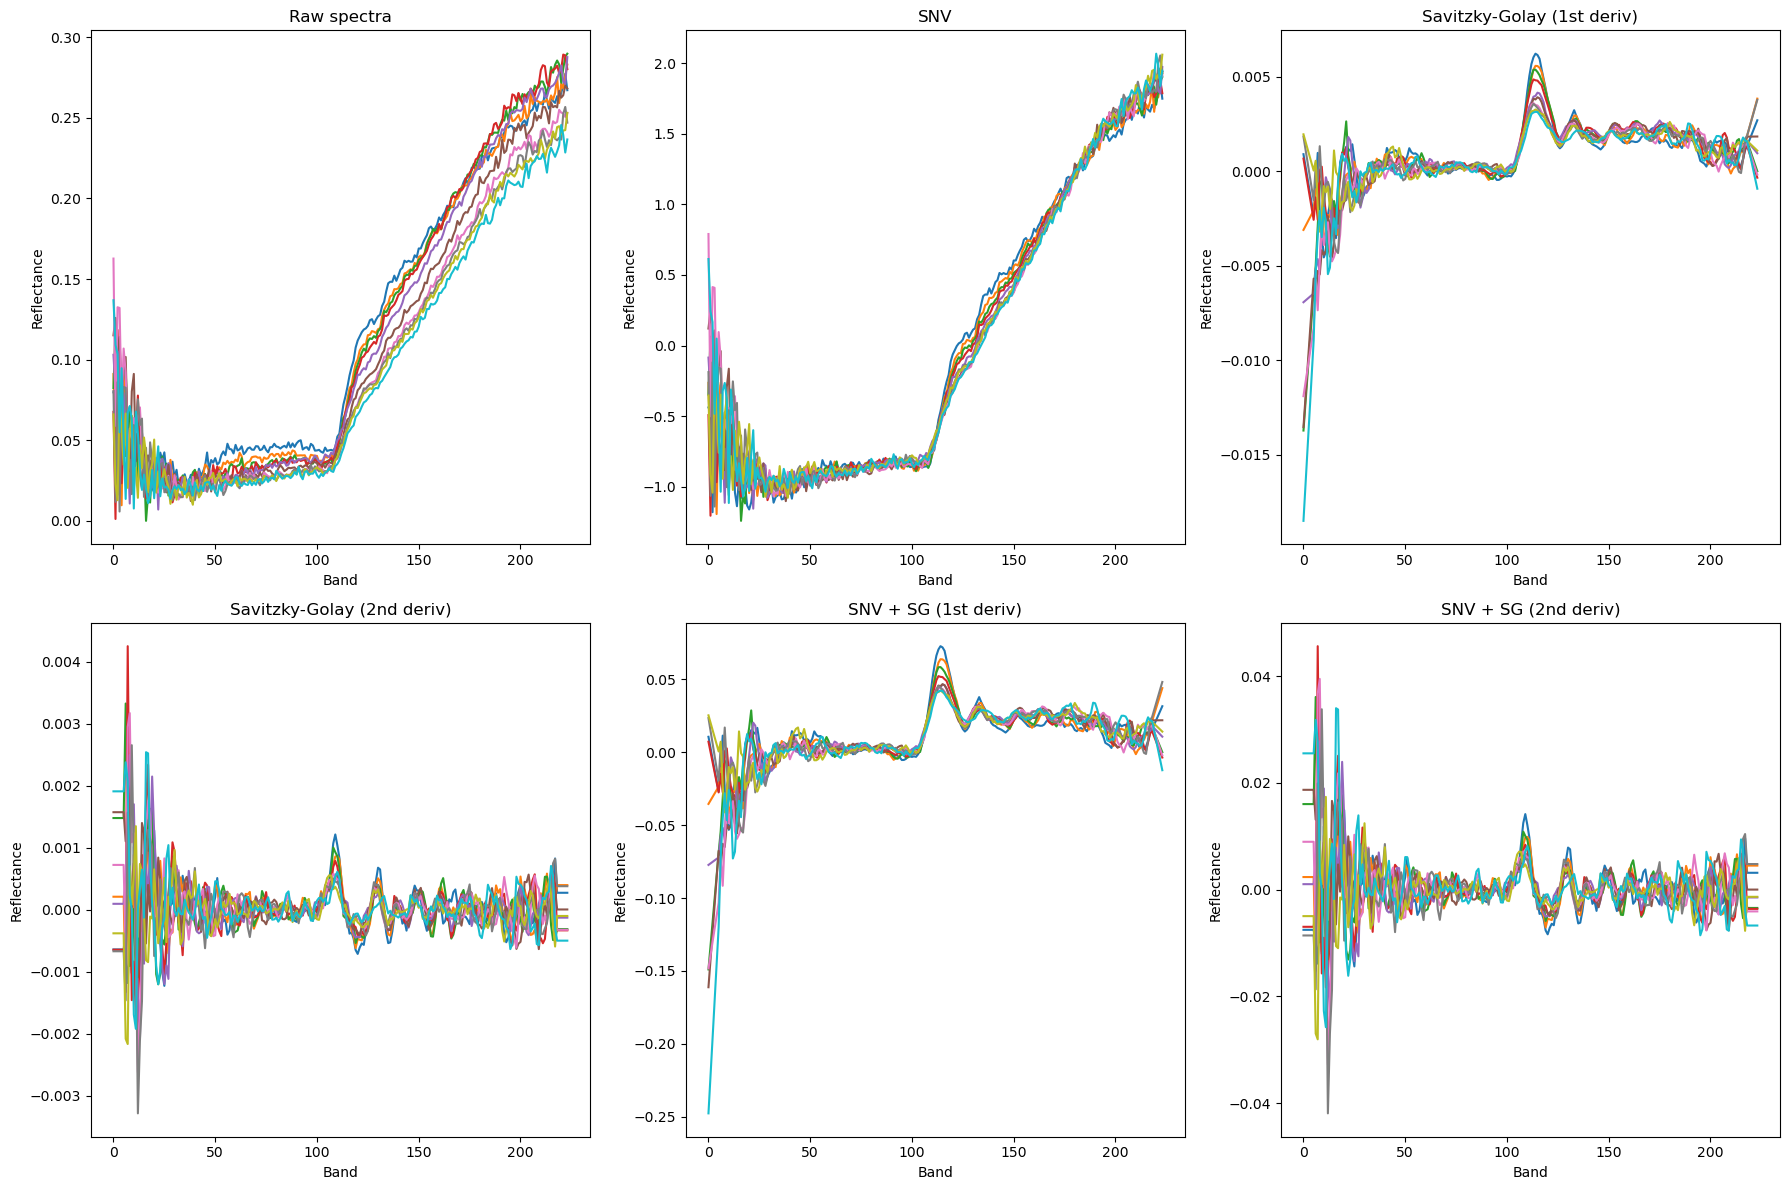

In [8]:
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

# Sample DataFrame: simulate reading from one of your CSV files
df = pd.read_csv("F:/Mini project/converted_csv/kochia/kochia_1.csv")

# Drop label column if it exists
if 'label' in df.columns:
    df = df.drop(columns=['label'])

# Convert DataFrame to NumPy array
X = df.values

# --- Preprocessing Functions ---
def snv(input_data):
    # Standard Normal Variate
    return (input_data - np.mean(input_data, axis=1, keepdims=True)) / np.std(input_data, axis=1, keepdims=True)

# Savitzky-Golay parameters
w = 11  # window size
p = 2   # polynomial order

# --- Generate Signals ---
raw_data = X
snv_data = snv(X)
SG_firstDeriv = savgol_filter(X, w, polyorder=p, deriv=1)
SG_secondDeriv = savgol_filter(X, w, polyorder=p, deriv=2)
snv_SG_1 = savgol_filter(snv_data, w, polyorder=p, deriv=1)
snv_SG_2 = savgol_filter(snv_data, w, polyorder=p, deriv=2)

# --- Visualization ---
titles = ['Raw spectra', 'SNV', 'Savitzky-Golay (1st deriv)', 'Savitzky-Golay (2nd deriv)', 
          'SNV + SG (1st deriv)', 'SNV + SG (2nd deriv)']
signals = [raw_data, snv_data, SG_firstDeriv, SG_secondDeriv, snv_SG_1, snv_SG_2]

plt.figure(figsize=(18, 12))
for i, signal in enumerate(signals):
    plt.subplot(2, 3, i+1)
    for spectrum in signal[:10]:  # Plot first 10 spectra
        plt.plot(spectrum)
    plt.title(titles[i])
    plt.xlabel("Band")
    plt.ylabel("Reflectance")
plt.tight_layout()
plt.show()
